# ID5059 2022-23: Coursework Assignment 1

Note: All references for code or thresholds is linked by the code. 

### Get the data

This notebook uses "used_cars_data_small_0.csv" and "used_cars_data_medium_2.csv".

In [422]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn | grep -v 'already satisfied'

import pandas
import numpy
import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [423]:
# Read the dataset from a file.
# Specify type 'string' for the 'bed' and 'dealer_zip' attributes, to avoid errors interpreting them as numbers.
# Cars 0 is the small dataset.
cars = pandas.read_csv("/users/ardhyaandien/Documents/ID5059/cars0.csv", dtype={"bed": "string", "dealer_zip": "string"})

# Clear the maximum number of columns to be displayed, so that all will be visible.
pandas.set_option('display.max_columns', None)

display(cars)

vin back_legroom   bed bed_height bed_length  \
0     ZACNJABB5KPJ92081      35.1 in  <NA>        NaN        NaN   
1     SALCJ2FX1LH858117      38.1 in  <NA>        NaN        NaN   
2     JF1VA2M67G9829723      35.4 in  <NA>        NaN        NaN   
3     SALRR2RV0L2433391      37.6 in  <NA>        NaN        NaN   
4     SALCJ2FXXLH862327      38.1 in  <NA>        NaN        NaN   
...                 ...          ...   ...        ...        ...   
2755  3FA6P0HD4LR166836      38.3 in  <NA>        NaN        NaN   
2756  4JGDA5HB7HA816383      38.4 in  <NA>        NaN        NaN   
2757  1GTN1TEC7FZ903032           --  <NA>         --    78.9 in   
2758  3N1AB7AP9JY276352      37.4 in  <NA>        NaN        NaN   
2759  5NPEB4AC8BH173139      34.6 in  <NA>        NaN        NaN   

            body_type cabin         city  city_fuel_economy  \
0     SUV / Crossover   NaN      Bayamon                NaN   
1     SUV / Crossover   NaN     San Juan                NaN   
2               Sedan   NaN     Guaynabo               17.0   
3     SUV / Crossover   NaN     San Juan                NaN   
4     SUV / Crossover   NaN     San Juan                NaN   
...               ...   ...          ...                ...   
2755            Sedan   NaN        Holly               23.0   
2756  SUV / Crossover   NaN    Greenwich               18.0   
2757     Pickup Truck   NaN      Redford               16.0   
2758            Sedan   NaN  Wallingford                NaN   
2759            Sedan   NaN   West Nyack               22.0   

      combine_fuel_economy  daysonmarket dealer_zip  \
0                      NaN           522      00960   
1                      NaN           207      00922   
2                      NaN          1233      00969   
3                      NaN           196      00922   
4                      NaN           137      00922   
...                    ...           ...        ...   
2755                   NaN           197      48442   
2756                   NaN            12      06830   
2757                   NaN            15      48240   
2758                   NaN            61      06492   
2759                   NaN             7      10994   

                                            description engine_cylinders  \
0     [!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...               I4   
1     [!@@Additional Info@@!]Keyless Entry,Ebony Mor...               I4   
2                                                   NaN               H4   
3     [!@@Additional Info@@!]Fog Lights,7 Seat Packa...               V6   
4     [!@@Additional Info@@!]Keyless Entry,Ebony Mor...               I4   
...                                                 ...              ...   
2755  Factory MSRP: $25,890 $7,529 off MSRP! AUTOMAT...               I4   
2756  LOCAL GREENWICH TRADE /// Clean CARFAX. 4MATIC...               V6   
2757  2015 GMC Sierra with just over 100,000 miles. ...               V8   
2758  [!@@Additional Info@@!]4 Cylinder Engine,ABS,A...              NaN   
2759  This mid-size car is equipped with the latest ...               I4   

      engine_displacement engine_type                       exterior_color  \
0                  1300.0          I4                         Solar Yellow   
1                  2000.0          I4                         Narvik Black   
2                  2500.0          H4                                 None   
3                  3000.0          V6                           Eiger Gray   
4                  2000.0          I4                         Narvik Black   
...                   ...         ...                                  ...   
2755               2500.0          I4  Alto Blue Metallic Tinted Clearcoat   
2756               3500.0          V6              Obsidian Black Metallic   
2757               5300.0          V8                                WHITE   
2758               1800.0         NaN                         Fresh Powder   
2759          

## Remove Price

In [424]:
# Keep data price into another list. 

price = list(cars["price"])

# Drop column 'price'.
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
cars = cars.drop('price', axis=1)

# Print the updated DataFrame
print(cars.dtypes)


vin                     object
back_legroom            object
bed                     string
bed_height              object
bed_length              object
                         ...  
wheel_system            object
wheel_system_display    object
wheelbase               object
width                   object
year                     int64
Length: 65, dtype: object


## Data Cleaning 

### 1. Remove variables with high NaN

In [425]:
# Check for missing values 
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vin                      2760 non-null   object 
 1   back_legroom             2689 non-null   object 
 2   bed                      7 non-null      string 
 3   bed_height               132 non-null    object 
 4   bed_length               132 non-null    object 
 5   body_type                2755 non-null   object 
 6   cabin                    12 non-null     object 
 7   city                     2760 non-null   object 
 8   city_fuel_economy        2180 non-null   float64
 9   combine_fuel_economy     0 non-null      float64
 10  daysonmarket             2760 non-null   int64  
 11  dealer_zip               2760 non-null   string 
 12  description              2715 non-null   object 
 13  engine_cylinders         2709 non-null   object 
 14  engine_displacement     

In [426]:
# Remove variables with high NaN values 
# Source: https://datatofish.com/count-nan-pandas-dataframe/
cars = cars.drop(columns=['bed', 'bed_height', 'bed_length', 'cabin', 'combine_fuel_economy', 'franchise_make', 'is_certified', 'is_cpo', 'is_oemcpo', 'vehicle_damage_category'])

display(cars)



vin back_legroom        body_type         city  \
0     ZACNJABB5KPJ92081      35.1 in  SUV / Crossover      Bayamon   
1     SALCJ2FX1LH858117      38.1 in  SUV / Crossover     San Juan   
2     JF1VA2M67G9829723      35.4 in            Sedan     Guaynabo   
3     SALRR2RV0L2433391      37.6 in  SUV / Crossover     San Juan   
4     SALCJ2FXXLH862327      38.1 in  SUV / Crossover     San Juan   
...                 ...          ...              ...          ...   
2755  3FA6P0HD4LR166836      38.3 in            Sedan        Holly   
2756  4JGDA5HB7HA816383      38.4 in  SUV / Crossover    Greenwich   
2757  1GTN1TEC7FZ903032           --     Pickup Truck      Redford   
2758  3N1AB7AP9JY276352      37.4 in            Sedan  Wallingford   
2759  5NPEB4AC8BH173139      34.6 in            Sedan   West Nyack   

      city_fuel_economy  daysonmarket dealer_zip  \
0                   NaN           522      00960   
1                   NaN           207      00922   
2                  17.0          1233      00969   
3                   NaN           196      00922   
4                   NaN           137      00922   
...                 ...           ...        ...   
2755               23.0           197      48442   
2756               18.0            12      06830   
2757               16.0            15      48240   
2758                NaN            61      06492   
2759               22.0             7      10994   

                                            description engine_cylinders  \
0     [!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...               I4   
1     [!@@Additional Info@@!]Keyless Entry,Ebony Mor...               I4   
2                                                   NaN               H4   
3     [!@@Additional Info@@!]Fog Lights,7 Seat Packa...               V6   
4     [!@@Additional Info@@!]Keyless Entry,Ebony Mor...               I4   
...                                                 ...              ...   
2755  Factory MSRP: $25,890 $7,529 off MSRP! AUTOMAT...               I4   
2756  LOCAL GREENWICH TRADE /// Clean CARFAX. 4MATIC...               V6   
2757  2015 GMC Sierra with just over 100,000 miles. ...               V8   
2758  [!@@Additional Info@@!]4 Cylinder Engine,ABS,A...              NaN   
2759  This mid-size car is equipped with the latest ...               I4   

      engine_displacement engine_type                       exterior_color  \
0                  1300.0          I4                         Solar Yellow   
1                  2000.0          I4                         Narvik Black   
2                  2500.0          H4                                 None   
3                  3000.0          V6                           Eiger Gray   
4                  2000.0          I4                         Narvik Black   
...                   ...         ...                                  ...   
2755               2500.0          I4  Alto Blue Metallic Tinted Clearcoat   
2756               3500.0          V6              Obsidian Black Metallic   
2757               5300.0          V8                                WHITE   
2758               1800.0         NaN                         Fresh Powder   
2759               2400.0          I4                     Black Plum Pearl   

      fleet frame_damaged  franchise_dealer front_legroom fuel_tank_volume  \
0       NaN           NaN              True       41.2 in         12.7 gal   
1       NaN           NaN              True       39.1 in         17.7 gal   
2     False         False              True       43.3 in         15.9 gal   
3       NaN           NaN              True         39 in         23.5 gal   
4       NaN           NaN              True       39.1 in         17.7 gal   
...     ...           ...               ...           ...              ...   
2755    NaN           NaN              True       44.3 in         16.5 gal   
2756  False         False              True       40.3 in         24.6 gal   
27

### 2. Drop unsuitable variables 

In [427]:
# Drop description because it has repition with engine_cylinders 
# Drop engine_type because it is a duplicate of engine_cylinders
# Drop main_picture_url because the data is not useful for analysis, because it is a link 
# Drop savings_amount becvause it is irrelevant and only has one number (0)
# Drop sp_id, listing_id and trimId because it is an ID. 
# Drop trim_name because it has some correlation to trimId and wheel_system
# Drop vin because it is an ID.
# Drop power because of repetition with horsepower 
cars=cars.drop(columns=['vin','description', 'power','engine_type', 'main_picture_url', 'savings_amount', 'sp_id', 'listing_id', 'trimId', 'trim_name', 'trim_name'])

### Convert categorical to numerical 

In [428]:
# Create a function that removes "in" from variables that have them, then change them into floats

def removein(cars):
    cols_to_remove = ['height','back_legroom','front_legroom','length','wheelbase','width']
    for col in cols_to_remove:
        cars[col] = cars[col].astype(str)
        cars[col] = cars[col].str.replace(" in", "")
        cars[col] = cars[col].str.replace("--", "")
        cars[col] = cars[col].apply(lambda x: np.nan if x == "" else float(x))
    return cars

In [429]:
# Implements function into the dataframe 
cars = removein(cars)

display(cars)

back_legroom        body_type         city  city_fuel_economy  \
0             35.1  SUV / Crossover      Bayamon                NaN   
1             38.1  SUV / Crossover     San Juan                NaN   
2             35.4            Sedan     Guaynabo               17.0   
3             37.6  SUV / Crossover     San Juan                NaN   
4             38.1  SUV / Crossover     San Juan                NaN   
...            ...              ...          ...                ...   
2755          38.3            Sedan        Holly               23.0   
2756          38.4  SUV / Crossover    Greenwich               18.0   
2757           NaN     Pickup Truck      Redford               16.0   
2758          37.4            Sedan  Wallingford                NaN   
2759          34.6            Sedan   West Nyack               22.0   

      daysonmarket dealer_zip engine_cylinders  engine_displacement  \
0              522      00960               I4               1300.0   
1              207      00922               I4               2000.0   
2             1233      00969               H4               2500.0   
3              196      00922               V6               3000.0   
4              137      00922               I4               2000.0   
...            ...        ...              ...                  ...   
2755           197      48442               I4               2500.0   
2756            12      06830               V6               3500.0   
2757            15      48240               V8               5300.0   
2758            61      06492              NaN               1800.0   
2759             7      10994               I4               2400.0   

                           exterior_color  fleet frame_damaged  \
0                            Solar Yellow    NaN           NaN   
1                            Narvik Black    NaN           NaN   
2                                    None  False         False   
3                              Eiger Gray    NaN           NaN   
4                            Narvik Black    NaN           NaN   
...                                   ...    ...           ...   
2755  Alto Blue Metallic Tinted Clearcoat    NaN           NaN   
2756              Obsidian Black Metallic  False         False   
2757                                WHITE  False         False   
2758                         Fresh Powder   True         False   
2759                     Black Plum Pearl  False         False   

      franchise_dealer  front_legroom fuel_tank_volume fuel_type  \
0                 True           41.2         12.7 gal  Gasoline   
1                 True           39.1         17.7 gal  Gasoline   
2                 True           43.3         15.9 gal  Gasoline   
3                 True           39.0         23.5 gal  Gasoline   
4                 True           39.1         17.7 gal  Gasoline   
...                ...            ...              ...       ...   
2755              True           44.3         16.5 gal  Gasoline   
2756              True           40.3         24.6 gal  Gasoline   
2757             False           45.3           26 gal  Gasoline   
2758             False           42.5         13.2 gal       NaN   
2759              True           45.5         18.5 gal  Gasoline   

     has_accidents  height  highway_fuel_economy  horsepower  \
0              NaN    66.5                   NaN       177.0   
1              NaN    68.0                   NaN       246.0   
2            False    58.1                  23.0       305.0   
3              NaN    73.0                   NaN       340.0   
4              NaN    68.0                   NaN       246.0   
...            ...     ...                   ...         ...   
2755           NaN    58.1                  34.0       175.0   
2756         False    70.7                  22.0       302.0   
2757          True    74.0                  23.0       355.0   
2758          True    58.9                   NaN  

In [430]:
# The method is repeated for " gal"


def removegal(cars):
    cols_to_remove = ['fuel_tank_volume']
    for col in cols_to_remove:
        cars[col] = cars[col].astype(str)
        cars[col] = cars[col].str.replace(" gal", "")
        cars[col] = cars[col].str.replace("--", "")
        cars[col] = cars[col].apply(lambda x: np.nan if x == "" else float(x))
    return cars


In [431]:
cars = removegal(cars)

display(cars)

back_legroom        body_type         city  city_fuel_economy  \
0             35.1  SUV / Crossover      Bayamon                NaN   
1             38.1  SUV / Crossover     San Juan                NaN   
2             35.4            Sedan     Guaynabo               17.0   
3             37.6  SUV / Crossover     San Juan                NaN   
4             38.1  SUV / Crossover     San Juan                NaN   
...            ...              ...          ...                ...   
2755          38.3            Sedan        Holly               23.0   
2756          38.4  SUV / Crossover    Greenwich               18.0   
2757           NaN     Pickup Truck      Redford               16.0   
2758          37.4            Sedan  Wallingford                NaN   
2759          34.6            Sedan   West Nyack               22.0   

      daysonmarket dealer_zip engine_cylinders  engine_displacement  \
0              522      00960               I4               1300.0   
1              207      00922               I4               2000.0   
2             1233      00969               H4               2500.0   
3              196      00922               V6               3000.0   
4              137      00922               I4               2000.0   
...            ...        ...              ...                  ...   
2755           197      48442               I4               2500.0   
2756            12      06830               V6               3500.0   
2757            15      48240               V8               5300.0   
2758            61      06492              NaN               1800.0   
2759             7      10994               I4               2400.0   

                           exterior_color  fleet frame_damaged  \
0                            Solar Yellow    NaN           NaN   
1                            Narvik Black    NaN           NaN   
2                                    None  False         False   
3                              Eiger Gray    NaN           NaN   
4                            Narvik Black    NaN           NaN   
...                                   ...    ...           ...   
2755  Alto Blue Metallic Tinted Clearcoat    NaN           NaN   
2756              Obsidian Black Metallic  False         False   
2757                                WHITE  False         False   
2758                         Fresh Powder   True         False   
2759                     Black Plum Pearl  False         False   

      franchise_dealer  front_legroom  fuel_tank_volume fuel_type  \
0                 True           41.2              12.7  Gasoline   
1                 True           39.1              17.7  Gasoline   
2                 True           43.3              15.9  Gasoline   
3                 True           39.0              23.5  Gasoline   
4                 True           39.1              17.7  Gasoline   
...                ...            ...               ...       ...   
2755              True           44.3              16.5  Gasoline   
2756              True           40.3              24.6  Gasoline   
2757             False           45.3              26.0  Gasoline   
2758             False           42.5              13.2       NaN   
2759              True           45.5              18.5  Gasoline   

     has_accidents  height  highway_fuel_economy  horsepower  \
0              NaN    66.5                   NaN       177.0   
1              NaN    68.0                   NaN       246.0   
2            False    58.1                  23.0       305.0   
3              NaN    73.0                   NaN       340.0   
4              NaN    68.0                   NaN       246.0   
...            ...     ...                   ...         ...   
2755           NaN    58.1                  34.0       175.0   
2756         False    70.7                  22.0       302.0   
2757          True    74.0                  23.0       355.0   
2758          True    58.9            

In [432]:
# Keep only the first 3 values of torque 
cars['torque'] = cars['torque'].str[:3]

cars['torque'] = cars['torque'].astype(float)

display(cars['torque'])

0       200.0
1       269.0
2       290.0
3       332.0
4       269.0
        ...  
2755    185.0
2756    273.0
2757    383.0
2758    125.0
2759    184.0
Name: torque, Length: 2760, dtype: float64

In [433]:
print(cars["torque"].dtypes)

float64


### Fill in NaNs (Numeric)

In [434]:
#Source: https://www.geeksforgeeks.org/select-columns-with-specific-data-types-in-pandas-dataframe/
# Create a new dataset with onlhy numerical columns
numeric_columns = cars.select_dtypes(include=['int64', 'float64', 'bool'])
list(numeric_columns)

['back_legroom',
 'city_fuel_economy',
 'daysonmarket',
 'engine_displacement',
 'franchise_dealer',
 'front_legroom',
 'fuel_tank_volume',
 'height',
 'highway_fuel_economy',
 'horsepower',
 'is_new',
 'latitude',
 'length',
 'longitude',
 'mileage',
 'owner_count',
 'seller_rating',
 'torque',
 'wheelbase',
 'width',
 'year']

In [435]:
# Check for skewness
skewness = numeric_columns.skew()
print(skewness)

back_legroom           -2.849665
city_fuel_economy       4.345088
daysonmarket            3.423966
engine_displacement     1.199211
franchise_dealer       -0.566663
front_legroom           4.806841
fuel_tank_volume        1.042011
height                  0.501447
highway_fuel_economy    2.416470
horsepower              1.111575
is_new                  0.821348
latitude               -4.775505
length                  1.322311
longitude               0.648988
mileage                 1.402689
owner_count             1.838750
seller_rating           0.210606
torque                  1.821743
wheelbase               2.097673
width                   0.467868
year                   -1.866438
dtype: float64


In [436]:
# Find column with skewness inside the range -0.5 to 0.5
#Source: https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

# the lambda function returns True for skewed
num_mean_iterator = filter(lambda x: (0.5 > x > -0.5), skewness)

# converting to list
num_mean_value = list(num_mean_iterator)

print(num_mean_value)

[0.2106059276788969, 0.46786844411165646]


In [437]:
# Mean Imputation
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='median')

def num_mean(cars):
    cols_to_impute = ['width', 'seller_rating']
    for col in cols_to_impute:
        cars[col] = imp_mean.fit_transform(cars[col].values.reshape(-1,1))
    return cars

cars = num_mean(cars)


# Check it works
list(cars['seller_rating'])


[2.8,
 3.0,
 3.647058823529412,
 3.0,
 3.0,
 3.0,
 2.8,
 3.0,
 3.0,
 3.0,
 3.647058823529412,
 3.0,
 3.647058823529412,
 3.0,
 2.8,
 2.8,
 3.0,
 3.0,
 3.0,
 3.0,
 2.8,
 2.8,
 3.0,
 3.0,
 3.0,
 3.0,
 2.8,
 2.8,
 3.0,
 3.0,
 3.0,
 2.8,
 3.0,
 2.8,
 3.0,
 3.0,
 3.4477611940298507,
 3.0,
 3.4477611940298507,
 3.0,
 2.8,
 3.4477611940298507,
 2.8,
 2.8,
 2.8,
 3.4477611940298507,
 3.0,
 3.4477611940298507,
 3.0,
 2.8,
 2.8,
 2.8,
 3.0,
 2.8,
 3.4477611940298507,
 3.4477611940298507,
 2.8,
 2.8,
 3.0,
 2.8,
 3.4477611940298507,
 2.8,
 3.4477611940298507,
 3.0,
 3.4477611940298507,
 2.8,
 3.0,
 3.0,
 2.8,
 2.8,
 2.8,
 2.8,
 3.4477611940298507,
 3.4477611940298507,
 3.0,
 2.8,
 3.0,
 3.4477611940298507,
 3.4477611940298507,
 3.0,
 2.8,
 3.4477611940298507,
 2.8,
 3.0,
 2.8,
 2.8,
 2.8,
 2.8,
 2.8,
 3.0,
 2.8,
 3.4477611940298507,
 3.4477611940298507,
 3.4477611940298507,
 2.8,
 3.0,
 3.4477611940298507,
 3.0,
 2.8,
 3.0,
 3.4477611940298507,
 2.8,
 3.4477611940298507,
 3.0,
 2.8,
 2.8,
 3.4477

In [438]:
# Median Imputation
imp_median = SimpleImputer(strategy='median')

def num_med(cars):
    cols_to_impute = ['back_legroom','city_fuel_economy','daysonmarket',
                       'engine_displacement','franchise_dealer','front_legroom',
                       'fuel_tank_volume','height','highway_fuel_economy','horsepower',
                       'is_new','latitude','length','longitude','mileage',
                       'owner_count','torque','wheelbase', 'year']
    for col in cols_to_impute:
        cars[col] = imp_median.fit_transform(cars[col].values.reshape(-1,1))
    return cars

cars = num_med(cars)


### Fill in NaNs (Categorical)

In [439]:
# Source: https://www.geeksforgeeks.org/select-columns-with-specific-data-types-in-pandas-dataframe/
# source: https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/

# Create a new data frame with only categorical variables 
categorical_columns = cars.select_dtypes(exclude=['int64', 'float64', 'bool'])
list(categorical_columns)


['body_type',
 'city',
 'dealer_zip',
 'engine_cylinders',
 'exterior_color',
 'fleet',
 'frame_damaged',
 'fuel_type',
 'has_accidents',
 'interior_color',
 'isCab',
 'listed_date',
 'listing_color',
 'major_options',
 'make_name',
 'maximum_seating',
 'model_name',
 'salvage',
 'sp_name',
 'theft_title',
 'transmission',
 'transmission_display',
 'wheel_system',
 'wheel_system_display']

In [440]:
print(categorical_columns.dtypes)

body_type               object
city                    object
dealer_zip              string
engine_cylinders        object
exterior_color          object
fleet                   object
frame_damaged           object
fuel_type               object
has_accidents           object
interior_color          object
isCab                   object
listed_date             object
listing_color           object
major_options           object
make_name               object
maximum_seating         object
model_name              object
salvage                 object
sp_name                 object
theft_title             object
transmission            object
transmission_display    object
wheel_system            object
wheel_system_display    object
dtype: object


In [441]:
# Use SimpleImputer to impute the most_frequent value in the categorical variables 
imp_most = SimpleImputer(strategy='most_frequent')

def num_most(cars):
    cols_to_impute = ['body_type','city','dealer_zip','engine_cylinders','exterior_color',
                       'fleet','frame_damaged','fuel_type','has_accidents','interior_color',
                       'isCab','listed_date','listing_color','major_options','make_name',
                       'maximum_seating','model_name','salvage','sp_name','theft_title',
                       'transmission','transmission_display','wheel_system','wheel_system_display']
    for col in cols_to_impute:
        cars[col] = imp_most.fit_transform(cars[[col]].values)
    return cars


cars = num_most(cars)

In [442]:
# Check cars data fram missing values 
cars.isnull().sum()

back_legroom            0
body_type               0
city                    0
city_fuel_economy       0
daysonmarket            0
dealer_zip              0
engine_cylinders        0
engine_displacement     0
exterior_color          0
fleet                   0
frame_damaged           0
franchise_dealer        0
front_legroom           0
fuel_tank_volume        0
fuel_type               0
has_accidents           0
height                  0
highway_fuel_economy    0
horsepower              0
interior_color          0
isCab                   0
is_new                  0
latitude                0
length                  0
listed_date             0
listing_color           0
longitude               0
major_options           0
make_name               0
maximum_seating         0
mileage                 0
model_name              0
owner_count             0
salvage                 0
seller_rating           0
sp_name                 0
theft_title             0
torque                  0
transmission

### 3. Take out multicollinear data 

In [443]:
# Factorise the categorical variables and add it into a new data frame 
corr_1= cars[['body_type','city','dealer_zip','engine_cylinders','exterior_color',
                       'fleet','frame_damaged','fuel_type','has_accidents','interior_color',
                       'isCab','listed_date','listing_color','major_options','make_name',
                       'maximum_seating','model_name','salvage','sp_name','theft_title',
                       'transmission','transmission_display','wheel_system','wheel_system_display']].apply(lambda x: pd.factorize(x)[0])

print(corr_1)

      body_type  city  dealer_zip  engine_cylinders  exterior_color  fleet  \
0             0     0           0                 0               0      0   
1             0     1           1                 0               1      0   
2             1     2           2                 1               2      0   
3             0     1           1                 2               3      0   
4             0     1           1                 0               1      0   
...         ...   ...         ...               ...             ...    ...   
2755          1    26          27                 0             510      0   
2756          0    19          19                 2             511      0   
2757          4    25          26                 5             101      0   
2758          1    18          18                 0             377      1   
2759          1    23          24                 0             512      0   

      frame_damaged  fuel_type  has_accidents  interior_color  

In [444]:
# Concatenate the factorised categorical variables and the numerical variables into a new data frame 
corr = pd.concat([corr_1, cars[['back_legroom','city_fuel_economy','daysonmarket',
                       'engine_displacement','franchise_dealer','front_legroom',
                       'fuel_tank_volume','height','highway_fuel_economy','horsepower',
                       'is_new','latitude','length','longitude','mileage',
                       'owner_count','torque','wheelbase', 'year','width','seller_rating']]], axis=1)


print(corr.dtypes)

body_type                 int64
city                      int64
dealer_zip                int64
engine_cylinders          int64
exterior_color            int64
fleet                     int64
frame_damaged             int64
fuel_type                 int64
has_accidents             int64
interior_color            int64
isCab                     int64
listed_date               int64
listing_color             int64
major_options             int64
make_name                 int64
maximum_seating           int64
model_name                int64
salvage                   int64
sp_name                   int64
theft_title               int64
transmission              int64
transmission_display      int64
wheel_system              int64
wheel_system_display      int64
back_legroom            float64
city_fuel_economy       float64
daysonmarket            float64
engine_displacement     float64
franchise_dealer        float64
front_legroom           float64
fuel_tank_volume        float64
height  

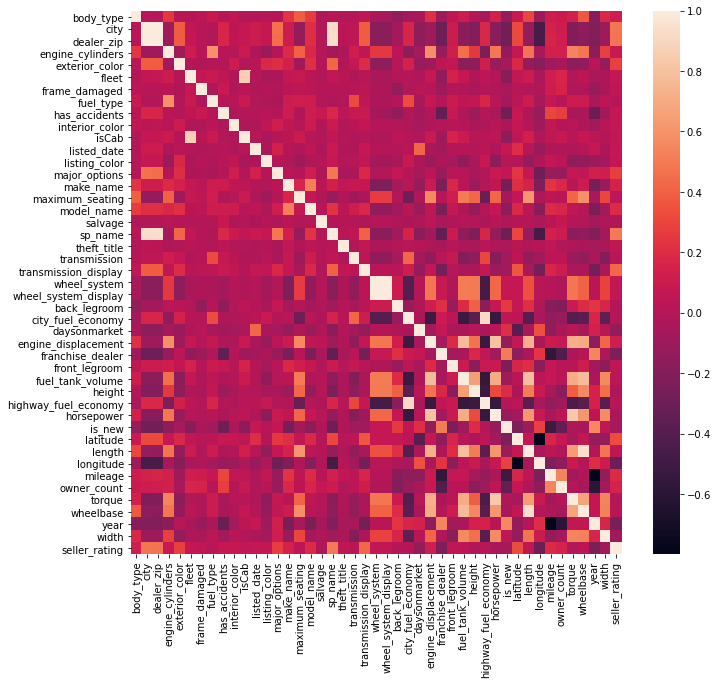

In [445]:

# Present a heatmap based on a correlation matrix 
fig, ax = plt.subplots(figsize=(11,10))
dataplot=sb.heatmap(corr.corr())




In [446]:
# Take out the variables with high negative and positive correlation. 
# Cut out variables with correlation bigger than 0.7 
# Source: https://blog.clairvoyantsoft.com/correlation-and-collinearity-how-they-can-make-or-break-a-model-9135fbe6936a

horsepower = corr['horsepower']

torque = corr['torque']

frame_damaged= corr['frame_damaged']
import numpy as np
corr_matrix = corr.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.7 )]

corr = corr.drop(to_drop, axis=1)

print(to_drop)




['dealer_zip', 'isCab', 'sp_name', 'wheel_system_display', 'fuel_tank_volume', 'highway_fuel_economy', 'horsepower', 'length', 'torque', 'wheelbase']


In [447]:
# Keeping these two variables because they are important to predict price 
corr['horsepower'] = horsepower
corr['torque'] = torque
corr['frame_damaged'] = frame_damaged

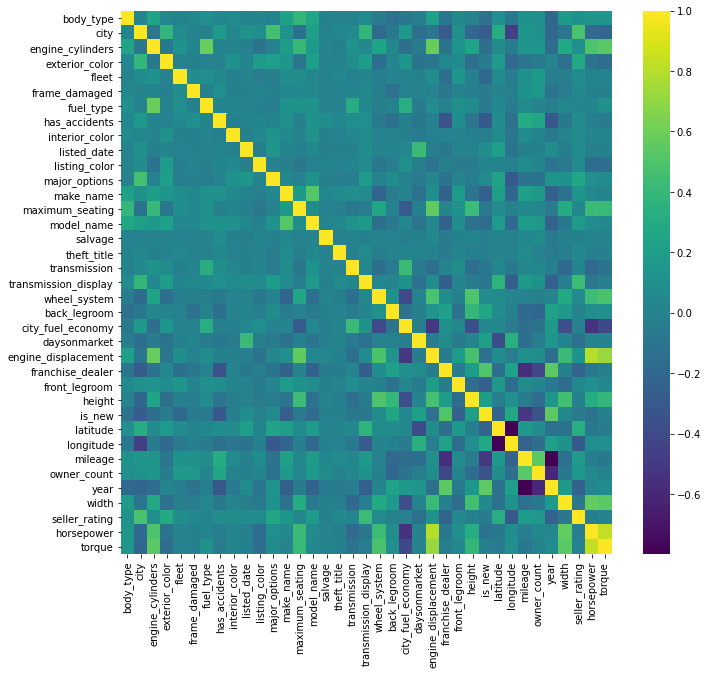

In [448]:
# The new heatmap 
fig, ax = plt.subplots(figsize=(11,10))
dataplot=sb.heatmap(corr.corr(), cmap="viridis")

In [449]:
# View the correlation matrix 
corr_matrix = cars.corr()

display(corr_matrix)

back_legroom  city_fuel_economy  daysonmarket  \
back_legroom              1.000000          -0.105219     -0.022580   
city_fuel_economy        -0.105219           1.000000     -0.032695   
daysonmarket             -0.022580          -0.032695      1.000000   
engine_displacement       0.128212          -0.515639     -0.056917   
franchise_dealer          0.216612           0.100409      0.068719   
front_legroom            -0.118683           0.036445     -0.047300   
fuel_tank_volume          0.189881          -0.523491     -0.028830   
height                    0.395959          -0.367169      0.010531   
highway_fuel_economy     -0.167562           0.915548     -0.035024   
horsepower                0.073157          -0.539445      0.010980   
is_new                    0.256101           0.048385      0.209235   
latitude                  0.066855           0.032460     -0.383277   
length                    0.215474          -0.395965     -0.046019   
longitude                -0.012339          -0.046915      0.342609   
mileage                  -0.187249          -0.147030     -0.155553   
owner_count              -0.203407          -0.114968     -0.041405   
seller_rating             0.006793           0.000167     -0.132480   
torque                    0.095796          -0.400993      0.014459   
wheelbase                 0.195536          -0.371920     -0.032815   
width                     0.165680          -0.362835      0.020231   
year                      0.237984           0.164660      0.145527   

                      engine_displacement  franchise_dealer  front_legroom  \
back_legroom                     0.128212          0.216612      -0.118683   
city_fuel_economy               -0.515639          0.100409       0.036445   
daysonmarket                    -0.056917          0.068719      -0.047300   
engine_displacement              1.000000         -0.054691       0.186601   
franchise_dealer                -0.054691          1.000000      -0.057216   
front_legroom                    0.186601         -0.057216       1.000000   
fuel_tank_volume                 0.775646         -0.046865       0.099194   
height                           0.466701          0.183744      -0.163649   
highway_fuel_economy            -0.527041          0.058522       0.091361   
horsepower                       0.798864         -0.077607       0.092087   
is_new                          -0.132429          0.507000      -0.240164   
latitude                         0.073743         -0.145667       0.167919   
length                           0.726803         -0.027729       0.204716   
longitude                       -0.042786          0.237333      -0.166070   
mileage                          0.097865         -0.563391       0.069426   
owner_count                      0.085964         -0.422920       0.021100   
seller_rating                    0.118732         -0.225899       0.048466   
torque                           0.721090         -0.029315       0.028708   
wheelbase                        0.702399          0.008539       0.112927   
width                            0.422776         -0.024851      -0.165140   
year                            -0.145814          0.549419      -0.067501   

                      fuel_tank_volume    height  highway_fuel_economy  \
back_legroom                  0.189881  0.395959             -0.167562   
city_fuel_economy            -0.523491 -0.367169              0.915548   
daysonmarket                 -0.028830  0.010531             -0.035024   
engine_displacement           0.775646  0.466701             -0.527041   
franchise_dealer             -0.046865  0.183744              0.058522   
front_legroom                 0.099194 -0.163649              0.091361   
fuel_tank_volume              1.000000  0.642381             -0.548916   
height                        0.642381  1.000000             -0.523704   
highway_fuel_economy         -0.548916 -0.523704              1.000000   
ho

In [450]:
# Find the minimum correlation values from all the variables 
corr_matrix.min(axis=1)

back_legroom           -0.203407
city_fuel_economy      -0.539445
daysonmarket           -0.383277
engine_displacement    -0.527041
franchise_dealer       -0.563391
front_legroom          -0.240164
fuel_tank_volume       -0.548916
height                 -0.523704
highway_fuel_economy   -0.548916
horsepower             -0.539445
is_new                 -0.514269
latitude               -0.785498
length                 -0.395965
longitude              -0.785498
mileage                -0.798581
owner_count            -0.593001
seller_rating          -0.303560
torque                 -0.437961
wheelbase              -0.383331
width                  -0.385901
year                   -0.798581
dtype: float64

In [451]:
# Add price into the correlation data frame 
corr['price'] = price

print(corr)

      body_type  city  engine_cylinders  exterior_color  fleet  frame_damaged  \
0             0     0                 0               0      0              0   
1             0     1                 0               1      0              0   
2             1     2                 1               2      0              0   
3             0     1                 2               3      0              0   
4             0     1                 0               1      0              0   
...         ...   ...               ...             ...    ...            ...   
2755          1    26                 0             510      0              0   
2756          0    19                 2             511      0              0   
2757          4    25                 5             101      0              0   
2758          1    18                 0             377      1              0   
2759          1    23                 0             512      0              0   

      fuel_type  has_accide

In [452]:
# Find the variables that highly correlate with price 
corr_matrix = corr.corr()

corr_matrix["price"].sort_values(ascending=False)

price                   1.000000
year                    0.587698
horsepower              0.552000
torque                  0.547443
is_new                  0.441752
width                   0.432157
longitude               0.414309
franchise_dealer        0.351304
height                  0.320192
wheel_system            0.309253
engine_displacement     0.300346
back_legroom            0.211749
daysonmarket            0.198025
maximum_seating         0.155372
engine_cylinders        0.151856
major_options           0.119513
interior_color         -0.011483
listed_date            -0.019392
salvage                -0.034291
theft_title            -0.042338
fuel_type              -0.049861
frame_damaged          -0.064513
exterior_color         -0.089418
body_type              -0.094985
front_legroom          -0.098915
model_name             -0.107964
fleet                  -0.112955
listing_color          -0.122082
transmission           -0.140679
city_fuel_economy      -0.193927
seller_rat

In [453]:
cars.columns

Index(['back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_cylinders', 'engine_displacement',
       'exterior_color', 'fleet', 'frame_damaged', 'franchise_dealer',
       'front_legroom', 'fuel_tank_volume', 'fuel_type', 'has_accidents',
       'height', 'highway_fuel_economy', 'horsepower', 'interior_color',
       'isCab', 'is_new', 'latitude', 'length', 'listed_date', 'listing_color',
       'longitude', 'major_options', 'make_name', 'maximum_seating', 'mileage',
       'model_name', 'owner_count', 'salvage', 'seller_rating', 'sp_name',
       'theft_title', 'torque', 'transmission', 'transmission_display',
       'wheel_system', 'wheel_system_display', 'wheelbase', 'width', 'year'],
      dtype='object')

In [454]:
# Drop variables that are multicollinear 
cars = cars.drop(columns=['dealer_zip', 'has_accidents', 'isCab', 'salvage', 'sp_name', 'theft_title', 'wheel_system_display', 'fuel_tank_volume', 'highway_fuel_economy', 'length', 'wheelbase'])


In [455]:
# Check numeric columns 
# It represents all the variables in the cars data frame in a numeric form 
numeric_columns = cars.select_dtypes(include=['int64', 'float64', 'bool'])
list(numeric_columns)

['back_legroom',
 'city_fuel_economy',
 'daysonmarket',
 'engine_displacement',
 'franchise_dealer',
 'front_legroom',
 'height',
 'horsepower',
 'is_new',
 'latitude',
 'longitude',
 'mileage',
 'owner_count',
 'seller_rating',
 'torque',
 'width',
 'year']

In [456]:
cars.isnull().sum()

back_legroom            0
body_type               0
city                    0
city_fuel_economy       0
daysonmarket            0
engine_cylinders        0
engine_displacement     0
exterior_color          0
fleet                   0
frame_damaged           0
franchise_dealer        0
front_legroom           0
fuel_type               0
height                  0
horsepower              0
interior_color          0
is_new                  0
latitude                0
listed_date             0
listing_color           0
longitude               0
major_options           0
make_name               0
maximum_seating         0
mileage                 0
model_name              0
owner_count             0
seller_rating           0
torque                  0
transmission            0
transmission_display    0
wheel_system            0
width                   0
year                    0
dtype: int64

### One Hot Encoding 

In [457]:
# List variables that are objects 
list(cars.select_dtypes(include=['object']))

['body_type',
 'city',
 'engine_cylinders',
 'exterior_color',
 'fleet',
 'frame_damaged',
 'fuel_type',
 'interior_color',
 'listed_date',
 'listing_color',
 'major_options',
 'make_name',
 'maximum_seating',
 'model_name',
 'transmission',
 'transmission_display',
 'wheel_system']

In [458]:
# One hot encoding based on the lecture notes
encoder = OneHotEncoder()

encoded = encoder.fit_transform(cars[['body_type','city','engine_cylinders','exterior_color','fleet',
 'frame_damaged','fuel_type','interior_color','listed_date','listing_color','major_options','make_name','maximum_seating','model_name','transmission','transmission_display','wheel_system']])

df_encoded = pd.DataFrame(encoded.toarray())

cars = pd.concat([cars, df_encoded], axis=1)

display(cars)

back_legroom        body_type         city  city_fuel_economy  \
0             35.1  SUV / Crossover      Bayamon               20.0   
1             38.1  SUV / Crossover     San Juan               20.0   
2             35.4            Sedan     Guaynabo               17.0   
3             37.6  SUV / Crossover     San Juan               20.0   
4             38.1  SUV / Crossover     San Juan               20.0   
...            ...              ...          ...                ...   
2755          38.3            Sedan        Holly               23.0   
2756          38.4  SUV / Crossover    Greenwich               18.0   
2757          38.1     Pickup Truck      Redford               16.0   
2758          37.4            Sedan  Wallingford               20.0   
2759          34.6            Sedan   West Nyack               22.0   

      daysonmarket engine_cylinders  engine_displacement  \
0            522.0               I4               1300.0   
1            207.0               I4               2000.0   
2           1233.0               H4               2500.0   
3            196.0               V6               3000.0   
4            137.0               I4               2000.0   
...            ...              ...                  ...   
2755         197.0               I4               2500.0   
2756          12.0               V6               3500.0   
2757          15.0               V8               5300.0   
2758          61.0               I4               1800.0   
2759           7.0               I4               2400.0   

                           exterior_color  fleet frame_damaged  \
0                            Solar Yellow  False         False   
1                            Narvik Black  False         False   
2                                    None  False         False   
3                              Eiger Gray  False         False   
4                            Narvik Black  False         False   
...                                   ...    ...           ...   
2755  Alto Blue Metallic Tinted Clearcoat  False         False   
2756              Obsidian Black Metallic  False         False   
2757                                WHITE  False         False   
2758                         Fresh Powder   True         False   
2759                     Black Plum Pearl  False         False   

      franchise_dealer  front_legroom fuel_type  height  horsepower  \
0                  1.0           41.2  Gasoline    66.5       177.0   
1                  1.0           39.1  Gasoline    68.0       246.0   
2                  1.0           43.3  Gasoline    58.1       305.0   
3                  1.0           39.0  Gasoline    73.0       340.0   
4                  1.0           39.1  Gasoline    68.0       246.0   
...                ...            ...       ...     ...         ...   
2755               1.0           44.3  Gasoline    58.1       175.0   
2756               1.0           40.3  Gasoline    70.7       302.0   
2757               0.0           45.3  Gasoline    74.0       355.0   
2758               0.0           42.5  Gasoline    58.9       130.0   
2759               1.0           45.5  Gasoline    58.0       198.0   

                 interior_color  is_new  latitude listed_date listing_color  \
0                         Black     1.0   18.3988  2019-04-06        YELLOW   
1                 Black (Ebony)     1.0   18.4439  2020-02-15         BLACK   
2                          None     0.0   18.3467  2017-04-25       UNKNOWN   
3      Gray (Ebony/Ebony/Ebony)     1.0   18.4439  2020-02-26          GRAY   
4                 Black (Ebony)     1.0   18.4439  2020-04-25         BLACK   
...                         ...     ...       ...         ...           ...   
2755  Blue (Medium Light Stone)     1.0   42.7851  2020-02-25          BLUE   
2756          Black Pearl/Black     0.0   41.0265  2020-08-28         BLACK   
2757                       None     0.0   42.4277  2020-08-25         WHITE

### Standardising the One Hot Encoding 

In [459]:
# Standardise to ensure the variables are consistent.

# initialize the scaler
scaler = StandardScaler()

# loop over each column and apply the scaler
for col in cars.select_dtypes(include=['int64', 'float64', 'bool']):
    cars[col] = scaler.fit_transform(cars[[col]])

# print the resulting scaled data frame
print(cars)

      back_legroom        body_type         city  city_fuel_economy  \
0        -0.831966  SUV / Crossover      Bayamon          -0.166077   
1         0.225261  SUV / Crossover     San Juan          -0.166077   
2        -0.726243            Sedan     Guaynabo          -0.735718   
3         0.049056  SUV / Crossover     San Juan          -0.166077   
4         0.225261  SUV / Crossover     San Juan          -0.166077   
...            ...              ...          ...                ...   
2755      0.295743            Sedan        Holly           0.403565   
2756      0.330984  SUV / Crossover    Greenwich          -0.545837   
2757      0.225261     Pickup Truck      Redford          -0.925598   
2758     -0.021425            Sedan  Wallingford          -0.166077   
2759     -1.008171            Sedan   West Nyack           0.213684   

      daysonmarket engine_cylinders  engine_displacement  \
0         4.110546               I4            -1.367273   
1         1.225160         

In [460]:
# Create a final dataset 
finalcars = cars.select_dtypes(include=['int64', 'float64', 'bool'])
display(finalcars)

back_legroom  city_fuel_economy  daysonmarket  engine_displacement  \
0        -0.831966          -0.166077      4.110546            -1.367273   
1         0.225261          -0.166077      1.225160            -0.748464   
2        -0.726243          -0.735718     10.623273            -0.306458   
3         0.049056          -0.166077      1.124401             0.135549   
4         0.225261          -0.166077      0.583964            -0.748464   
...            ...                ...           ...                  ...   
2755      0.295743           0.403565      1.133561            -0.306458   
2756      0.330984          -0.545837     -0.561031             0.577555   
2757      0.225261          -0.925598     -0.533551             2.168777   
2758     -0.021425          -0.166077     -0.112193            -0.925266   
2759     -1.008171           0.213684     -0.606830            -0.394859   

      franchise_dealer  front_legroom    height  horsepower    is_new  \
0             0.756144      -0.383929  0.333507   -0.784867  1.491408   
1             0.756144      -1.576708  0.565490    0.039805  1.491408   
2             0.756144       0.808851 -0.965600    0.744958 -0.670507   
3             0.756144      -1.633507  1.338769    1.163270  1.491408   
4             0.756144      -1.576708  0.565490    0.039805  1.491408   
...                ...            ...       ...         ...       ...   
2755          0.756144       1.376841 -0.965600   -0.808770  1.491408   
2756          0.756144      -0.895120  0.983061    0.709103 -0.670507   
2757         -1.322499       1.944832  1.493424    1.342546 -0.670507   
2758         -1.322499       0.354459 -0.841876   -1.346599 -0.670507   
2759          0.756144       2.058430 -0.981066   -0.533880 -0.670507   

      latitude  longitude   mileage  owner_count  seller_rating    torque  \
0    -5.033988   3.953557 -0.971709    -0.500965      -1.855361 -0.556942   
1    -5.023539   3.997554 -0.971687    -0.500965      -1.466787  0.150595   
2    -5.046060   3.980275 -0.231063     2.183820      -0.209635  0.365932   
3    -5.023539   3.997554 -0.971624    -0.500965      -1.466787  0.796607   
4    -5.023539   3.997554 -0.971709    -0.500965      -1.466787  0.150595   
...        ...        ...       ...          ...            ...       ...   
2755  0.616138  -5.646258 -0.971624    -0.500965       0.753637 -0.710754   
2756  0.208683  -0.172447  0.190064     0.841427       1.333232  0.191612   
2757  0.533331  -5.516804  1.158937     4.868606       0.799895  1.319569   
2758  0.313107   0.280170  0.164375    -0.500965       1.535831 -1.326004   
2759  0.223674  -0.348052  0.995250     0.841427      -0.239711 -0.721009   

         width      year         0         1        2         3         4  \
0     0.337030  0.573297 -0.110006 -0.178257 -0.14391 -0.181478 -0.232895   
1     1.335226  0.803717 -0.110006 -0.178257 -0.14391 -0.181478 -0.232895   
2     0.220574 -0.117965 -0.110006 -0.178257 -0.14391 -0.181478 -0.232895   
3     1.634685  0.803717 -0.110006 -0.178257 -0.14391 -0.181478 -0.232895   
4     1.335226  0.803717 -0.110006 -0.178257 -0.14391 -0.181478 -0.232895   
...        ...       ...       ...       ...      ...       ...       ...   
2755  0.985857  0.803717 -0.110006 -0.178257 -0.14391 -0.181478 -0.232895   
2756  1.118950  0.112455 -0.110006 -0.178257 -0.14391 -0.181478 -0.232895   
2757  0.403576 -0.348386 -0.110006 -0.178257 -0.14391 -0.181478  4.293789   
2758 -1.376540  0.342876 -0.110006 -0.178257 -0.14391 -0.181478 -0.232895   
2759 -0.894079 -1.270068 -0.110006 -0.178257 -0.14391 -0.181478 -0.232895   

             5         6        7         8         9        10        11  \
0     0.920538 -0.632135 -0.09167 -0.137208 -0.446046  9.233093 -0.357647   
1     0.920538 -0.632135 -0.09167 -0.137208 -0.446046 -0.108306 -0.357647   
2    -1.086322  1.581941 -0.09167 -0.137208 -0.446046 -0.108306 -0.357647   
3     0.920538 -0.632135 -0.09167 -0.137208 -0.446046 -0.1

In [461]:
# Add price 
finalcars['price']=price

print(finalcars['price'])

0       23141.0
1       46500.0
2       46995.0
3       67430.0
4       48880.0
         ...   
2755    18128.0
2756    29990.0
2757    11500.0
2758    12660.0
2759     6778.0
Name: price, Length: 2760, dtype: float64


<ipython-input-461-f60a4301bcb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalcars['price']=price


In [462]:
# Split into test and train data
# The former was split 20% and the latter 80%.
train_set, test_set = train_test_split(finalcars, test_size=0.2, random_state=672)

len(train_set)

cars_train = train_set 
cars_test = test_set 
cars_train

back_legroom  city_fuel_economy  daysonmarket  engine_displacement  \
542      -1.431061           6.479738     -0.441951            -0.925266   
2702     -0.091907          -0.166077     -0.414471            -0.306458   
1574     -0.303353          -0.545837     -0.350352             0.135549   
1084      0.859597          -0.166077     -0.487751            -1.190470   
796       1.000561          -0.355957      1.234320             0.312351   
...            ...                ...           ...                  ...   
255      -0.479557           1.732728     -0.295392            -1.278871   
677       0.789115          -0.166077     -0.661790            -1.190470   
1528      0.859597          -0.166077     -0.286232            -1.190470   
1201      0.260502          -0.166077     -0.615990            -0.748464   
791       0.225261           0.023804      0.153446            -0.394859   

      franchise_dealer  front_legroom    height  horsepower    is_new  \
542           0.756144       0.752052 -0.996531   -1.454165 -0.670507   
2702          0.756144       0.411258  0.240714   -0.796818 -0.670507   
1574         -1.322499      -0.838321  0.782008    0.685199 -0.670507   
1084          0.756144      -0.554326  0.163386   -0.868529  1.491408   
796           0.756144      -0.440728  0.287110    0.338598  1.491408   
...                ...            ...       ...         ...       ...   
255           0.756144       0.070464 -1.073859   -1.071709 -0.670507   
677           0.756144      -0.554326  0.163386   -0.868529 -0.670507   
1528          0.756144      -0.554326  0.163386   -0.868529  1.491408   
1201          0.756144      -0.213531  0.132455   -0.067761  1.491408   
791           0.756144      -0.611125  1.524355   -0.772915  1.491408   

      latitude  longitude   mileage  owner_count  seller_rating    torque  \
542   0.146682   0.118367 -0.136651    -0.500965      -0.209635 -0.003217   
2702  0.584999  -5.547056 -0.474385    -0.500965       1.836093 -0.844058   
1574  0.150969  -0.224615  0.132402     0.841427      -0.794255  0.468474   
1084  0.140751   0.033795 -0.231063    -0.500965      -0.596845 -0.526180   
796   0.380854   0.367337 -0.971560    -0.500965       1.210057  0.417203   
...        ...        ...       ...          ...            ...       ...   
255   0.140751   0.033795 -0.336196    -0.500965      -0.596845 -0.003217   
677   0.140751   0.033795 -0.626289    -0.500965      -0.596845 -0.003217   
1528  0.140751   0.033795 -0.231063    -0.500965      -0.596845 -0.526180   
1201  0.146682   0.118367 -0.971602    -0.500965      -0.209635  0.058308   
791   0.380854   0.367337 -0.971581    -0.500965       1.210057 -0.823550   

         width      year         0         1         2         3         4  \
542  -1.376540  0.342876 -0.110006 -0.178257  6.948792 -0.181478 -0.232895   
2702 -0.827532  0.342876 -0.110006 -0.178257 -0.143910 -0.181478 -0.232895   
1574  1.401772  0.112455 -0.110006 -0.178257 -0.143910 -0.181478 -0.232895   
1084 -0.827532  0.803717 -0.110006 -0.178257 -0.143910 -0.181478 -0.232895   
796  -0.727713  0.803717 -0.110006 -0.178257 -0.143910 -0.181478 -0.232895   
...        ...       ...       ...       ...       ...       ...       ...   
255  -1.176901  0.112455 -0.110006 -0.178257 -0.143910 -0.181478 -0.232895   
677  -0.827532  0.342876 -0.110006 -0.178257 -0.143910 -0.181478 -0.232895   
1528 -0.827532  0.803717 -0.110006 -0.178257 -0.143910 -0.181478 -0.232895   
1201 -0.760986  1.034138 -0.110006 -0.178257 -0.143910 -0.181478 -0.232895   
791   1.168860  0.803717 -0.110006 -0.178257 -0.143910 -0.181478 -0.232895   

             5         6          7         8         9        10        11  \
542  -1.086322 -0.632135  -0.091670 -0.137208 -0.446046 -0.108306  2.796049   
2702  0.920538 -0.632135  -0.091670 -0.137208 -0.446046 -0.108306 -0.357647   
1574  0.920538 -0.632135  -0.091670 -0.137208 -0.446046 -0.108306 -0.357647   
1084  0.920538 -0.632135  -0.091670 -0

## Model evaluation

### Linear Regression



In [463]:

# Conduct a linear regression using the lecture notes 
# y is the estimated variable 
# x are the predictor variables 

y = cars_train['price']
x = cars_train.drop('price', axis=1)
linear_regression = LinearRegression()
linear_regression.fit(x, y)

LinearRegression()

In [464]:
# See how accurate based on 5 random rows from the training dataset
some_data = x.iloc[:5]
some_labels = y.iloc[:5]



some_predictions = linear_regression.predict(some_data).round()
print("predictors", some_predictions)

print("estimated", some_labels)

predictors [22510. 19806. 29518. 26622. 29890.]
estimated 542     20805.0
2702    19808.0
1574    31495.0
1084    26254.0
796     29491.0
Name: price, dtype: float64


In [465]:
# Output root mean squared errors

linear_regression_cars_predictions = linear_regression.predict(x)
linear_regression_mse = mean_squared_error(y, linear_regression_cars_predictions)
linear_regression_rmse = numpy.sqrt(linear_regression_mse)
numpy.round(linear_regression_rmse)

3840.0

### Random Forest

In [466]:
# Create a random forest function
# Apply it into the training data 
# Find the RMSE

forest_regressor = RandomForestRegressor(n_estimators=100, random_state=672)
forest_regressor.fit(x, y)

forest_regressor_cars_predictions = forest_regressor.predict(x)
forest_regressor_mse = mean_squared_error(y, forest_regressor_cars_predictions)
forest_regressor_rmse = numpy.sqrt(forest_regressor_mse)
forest_regressor_rmse.round()

1606.0

### Decision Tree Model 

In [467]:
# Create a decision tree regression model 

tree_regressor = DecisionTreeRegressor(random_state=672)
tree_regressor.fit(x, y)

DecisionTreeRegressor(random_state=672)

In [468]:
# Find RMSE
tree_regressor_cars_predictions = tree_regressor.predict(x)
tree_regressor_mse = mean_squared_error(y, tree_regressor_cars_predictions)
tree_regressor_rmse = numpy.sqrt(tree_regressor_mse)
tree_regressor_rmse



321.2071100525472